In [11]:
### Payload estimation by use of a NN (TODO: MENTION MORE FEATURES)

# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
# Defines
file_path = "C:\\Users\\karlz\\Google Drive\\University\\Semester_9\\Project\\FirstData\\Data.xlsx"
# file_path = "C:\\Users\\karlz\\Google Drive\\University\\Semester_9\\Project\\FirstData\\FlaskeData.xlsx
data_title = "data_Flex_raw_data"
val_split, test_split = 0.2, 0.2 

In [13]:
# Load data
table_of_contents = pd.read_excel(file_path, sheet_name=0, header=None)
sheet_index = table_of_contents[table_of_contents[0] == data_title][0].index[0]
sheet_data = pd.read_excel(file_path, sheet_name=sheet_index + 1, header=None)
sheet_data.columns = ['1' ,'2', '3', '4', '5', '6', '7', '8', 'N/A_1', 'N/A_2', 'angle', 'time', 'session']
rearranged_cols_force = ['time', '1' ,'2', '3', '4', '5', '6', '7', '8']
rearranged_cols_angle = ['time', 'angle']
rearranged_cols_sensors_time_invariant = rearranged_cols_force[1:] + rearranged_cols_angle[1:]

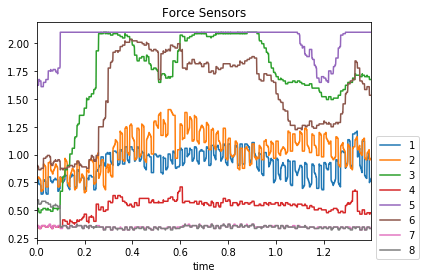

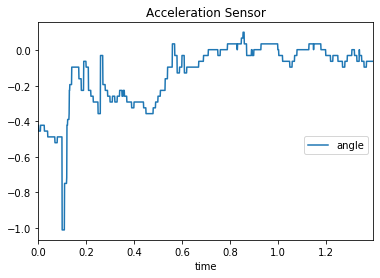

In [14]:
# Plot data

# data['time'] = data['time'].apply(lambda x : x - data['time'][0])
# Move times such that they start at 0

def plot_sensorband_dataframe(df, title):
    plt = df.plot(x='time')
    plt.legend(bbox_to_anchor=(1.0, 0.5))
    plt.set_title(title)

data_force = sheet_data[rearranged_cols_force]
plot_sensorband_dataframe(data_force, "Force Sensors")
data_angle = sheet_data[rearranged_cols_angle]
plot_sensorband_dataframe(data_angle, "Acceleration Sensor")

data_all_features = sheet_data[rearranged_cols_sensors_time_invariant]

In [26]:
# TODO TRY THIS? https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
# First split with traintestsplit, then try k-fold splits on the non-test-sets with the above function

def split_data(x, y, test_split_decimal, val_split_decimal):
    x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size=test_split_decimal, shuffle=False)
    val_split_new_size = val_split_decimal * (1 + (test_split_decimal / (1 - test_split_decimal)))
    x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, test_size=val_split_new_size, shuffle=False)
    return x_test, y_test, x_val, y_val, x_train, y_train

# Split data
# Gets just the force sensor #1
#x_test, y_test, x_val, y_val, x_train, y_train = split_data(data_force['time'], data_force['1'], test_split, val_split)
x_test, y_test, x_val, y_val, x_train, y_train = split_data(sheet_data['time'], data_all_features, test_split, val_split)

In [27]:
def reshape_data(dataframe, samples, time_steps, features): 
    return dataframe.to_numpy().reshape(samples, time_steps, features)        

# data_train = y_train
data_train = pd.concat([x_train, y_train], axis=1)
data_train = reshape_data(data_train, 1, data_train.shape[0], data_train.shape[1])
# data_val = pd.concat([x_val, y_val], axis=1)
# data_val = reshape_data(data_val, 1, data_val.shape[0], data_val.shape[1])
print(data_train.shape)

#TODO how do I ensure that it pays extra mind to the time feature of the dataset?
# I don't think I should have the time dimension in my array. ??
# x_train = np.array(x_train)
print(x_train.shape)
x_train = reshape_data(x_train, 1, x_train.shape[0], 1)
print(x_train.shape)

(1, 838, 10)
(838,)
(1, 838, 1)


In [28]:
# Compile ML algorithm #1: LSTM NN

units = 10


model_lstm = tf.keras.models.Sequential([tf.keras.layers.LSTM(units, input_shape=(data_train.shape[0], data_train.shape[1]), return_sequences=True)])    ## TODO Define input shape
## TODO define output layer
model_lstm.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

In [29]:
# Cross-validation training
history = model_lstm.fit(
    x_train,
    data_train,
    # validation_data = (x_val.values, y_val.values),
    validation_split = val_split,
    epochs = 8,
    batch_size = 512
)

# model_lstm.fit(data_train, epochs=8, validation_data=data_val, validation_steps=50)


ValueError: Error when checking input: expected lstm_2_input to have shape (1, 838) but got array with shape (838, 1)

In [ ]:
# Performance Evaluation